#### Import libraries.

In [1]:

import cv2
import os
import shutil
import tensorflow as tf
from glob import glob
from matplotlib import pyplot as plt
from pathlib import Path


#### Functions to load, resize and save images.

In [2]:

def resize_image_downsample(image):
    # Returns the image resized to 1/4 its original size.
    # Parameters:
    #    image (numpy.ndarray): original image.
    # Return:
    #    Resized image (numpy.ndarray).
    new_image = cv2.resize(image, None, fx = 0.25, fy = 0.25, interpolation = cv2.INTER_LANCZOS4)
    return new_image

def resize_image_padding(image, width, height):
    # Returns the image resized to size indicated by parameters.
    # Parameters:
    #    image (numpy.ndarray): original image.
    #    witdh (int): new width.
    #    height (int): new height.
    # Return:
    #    Resized image (image).
    h, w = image.shape[:2]
    vert_diff = height - h
    horiz_diff = width - w
    if (vert_diff < 0):
        vert_diff = 0
    if (horiz_diff < 0):
        horiz_diff = 0
    padded_image = cv2.copyMakeBorder(image, 0, vert_diff, 0, horiz_diff, cv2.BORDER_CONSTANT, value = 0)
    return padded_image

def load_and_resize_images():
    # Load all images and resize them to fit the same size.
    # Return:
    #    normal_images_list (list): resized images with normal classification.
    #    stone_images_list (list): resized images with stone classification.
    print("\nStart loading all images...")
    normal_images = [cv2.imread(nr_file) for nr_file in glob("../dataset/normal/*.png")]
    stone_images = [cv2.imread(st_file) for st_file in glob("../dataset/stone/*.png")]
    # Downsample all images. 
    resized_normal_images = []
    resized_stone_images = []
    for nr_img in normal_images:
        resized_normal_images.append(resize_image_downsample(nr_img))
    for st_img in stone_images:
        resized_stone_images.append(resize_image_downsample(st_img))
    # Detect max width and max height. Upsample all images with padding.
    max_width = 0
    max_height = 0
    for nr_img in resized_normal_images:
        h, w = nr_img.shape[:2]
        max_width = max(max_width, w)
        max_height = max(max_height, h)
    for st_img in resized_stone_images:
        h, w = st_img.shape[:2]
        max_width = max(max_width, w)
        max_height = max(max_height, h)
    normal_images_list = []
    stone_images_list = []
    for nr_img in resized_normal_images:
        normal_images_list.append(resize_image_padding(nr_img, max_width, max_height))
    for st_img in resized_stone_images:
        stone_images_list.append(resize_image_padding(st_img, max_width, max_height))
    print("Finish loading all images...")
    return normal_images_list, stone_images_list

def removing_error(func, path, exc_info):
    # Handle exceptions raised by shutil.rmtree.
    # Parameters:
    #    func: error informations.
    #    path: error informations.
    #    exc_info: error informations.
    print("\nException removing '{}' directory".format(path))
    print(exc_info)

def save_resized_images(normal_images_list, stone_images_list):
    # Save generated images for training.
    # Parameters:
    #    normal_images_list (list): resized images with normal classification.
    #    stone_images_list (list): resized images with stone classification.
    normal_path = "../dataset/resized_normal/"
    stone_path = "../dataset/resized_stone/"
    nr_dir = Path(normal_path)
    st_dir = Path(stone_path)
    # Delete directories.
    if (nr_dir.exists):
        print("\nRemoving '{}' directory...".format(normal_path))
        shutil.rmtree(normal_path, onerror = removing_error)
    if (st_dir.exists):
        print("\nRemoving '{}' directory...".format(stone_path))
        shutil.rmtree(stone_path, onerror = removing_error)
    # Recreate directories.
    try:
        print("\nRecreating '{}' directory...".format(normal_path))
        Path(normal_path).mkdir(parents = True, exist_ok = True)
    except IOError as e:
        print("\nError recreating '{}' directory...".format(normal_path))
    try:
        print("\nRecreating '{}' directory...".format(stone_path))
        Path(stone_path).mkdir(parents = True, exist_ok = True)
    except IOError as e:
        print("\nError recreating '{}' directory...".format(stone_path))
    # Save new images.
    nr_image_name = "nr_image{}.png"
    nr_image_count = 0
    nr_image_index = 1
    for nr_image in normal_images_list:
        if (cv2.imwrite(os.path.join(normal_path, nr_image_name.format(nr_image_index)), nr_image) is True):
            nr_image_count += 1
        nr_image_index += 1
    print("\n{} images created in '{}' directory.".format(nr_image_count, normal_path))
    st_image_name = "st_image{}.png"
    st_image_count = 0
    st_image_index = 1
    for st_image in stone_images_list:
        if (cv2.imwrite(os.path.join(stone_path, st_image_name.format(st_image_index)), st_image) is True):
            st_image_count += 1
        st_image_index += 1
    print("\n{} images created in '{}' directory.".format(st_image_count, stone_path))


#### Load, resize and save all images.


Start loading all images...
Finish loading all images...

Removing '../dataset/resized_normal/' directory...

Removing '../dataset/resized_stone/' directory...

Recreating '../dataset/resized_normal/' directory...

Recreating '../dataset/resized_stone/' directory...

750 images created in '../dataset/resized_normal/' directory.

750 images created in '../dataset/resized_stone/' directory.

Show some images to illustrate the pattern.


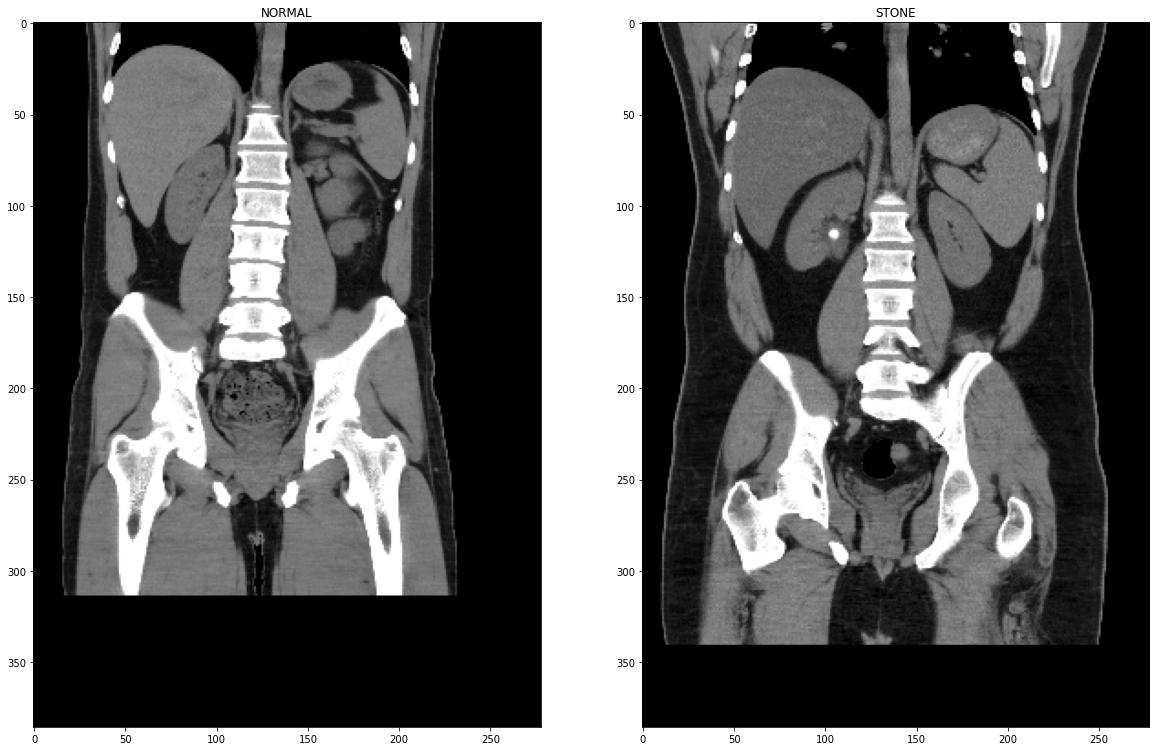

In [3]:

NORMAL_CLASS_VALUE = 0
STONE_CLASS_VALUE = 1

normal_img_list, stone_img_list = load_and_resize_images()
save_resized_images(normal_img_list, stone_img_list)

# Show one image of each class to illustrate the pattern.
print("\nShow some images to illustrate the pattern.")
fig, aux = plt.subplots(1, 2, figsize = (20, 20))
aux[0].set_title("NORMAL")
aux[1].set_title("STONE")
aux[0].imshow(normal_img_list[0])
aux[1].imshow(stone_img_list[0])
